In [1]:
# header files
import matplotlib.pyplot as plt
import numpy as np
import math

# Reading the real data into numpy dataframe
dataset = np.genfromtxt(r"datasets\2_music.txt",delimiter=',')
X_dataset = dataset[:,0:68] 
Y_dataset = dataset[:,68:70]
x_train = X_dataset[:math.floor(0.7*len(X_dataset))]
y_train = Y_dataset[:math.floor(0.7*len(X_dataset))]
x_valid = X_dataset[math.floor(0.7*len(X_dataset)):math.floor(0.8*len(X_dataset))]
y_valid = Y_dataset[math.floor(0.7*len(X_dataset)):math.floor(0.8*len(X_dataset))]
x_test = X_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]
y_test = Y_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]

degree = len(X_dataset[0])

In [4]:
# generates the gaussian basis function for the training data and the centers of the clusters 
# input : training data features, cluster centre features, sigma square (variance of the features), no. of clusters
def gaussian_Basis(x_train,mean,sigma_square,k):
    Phi = np.zeros((len(x_train),k))
    for i in range(len(x_train)):
        for j in range(k):
            for l in range(degree):
                Phi[i][j] += (x_train[i][l]-mean[j][l])**2
    return math.e**(Phi*(-1)/sigma_square)

In [13]:
# generates the Phi_tilde matrix required during Tikhonov regularization
# inputs : cluster centres, variance of the features, no. of clusters, no. of features
def generatePhi_tilde(mean,sigma_square,k):    
    Phi_tilde = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            for l in range(degree):
                Phi_tilde[i][j] += (mean[i][l]-mean[j][l])**2
    return math.e**(Phi_tilde*(-1)/sigma_square)

In [6]:
# returns the ERMS for the train, valid and test data using gaussian basis function to predict the function output
# training data features, training data target output, regularization coefficient, cluster centres, variance, no. of clusters 
def erms_error_gaussian(x_train,y_train,lamda,mean,sigma_square,k):
    Phi = gaussian_Basis(x_train,mean,sigma_square,k)
    I = generatePhi_tilde(mean,sigma_square,k)
    w = np.linalg.inv(Phi.transpose().dot(Phi)+lamda*I).dot(Phi.transpose().dot(y_train))

    # generate the model output for training data
    print("\nScatter plot of train data for "+str(k)+" clusters of gaussian basis function")
    predicted = Phi.dot(w)
    plt.scatter(y_train[:,0], predicted[:,0])
    plt.xlabel("Target output")
    plt.ylabel("Predicted output")
    plt.show()
    plt.scatter(y_train[:,1], predicted[:,1])
    plt.xlabel("Target output")
    plt.ylabel("Predicted output")
    plt.show()

    error_train = 0
    for i in range(len(y_train)):
        error_train += (predicted[i]-y_train[i])**2

    error_train /= len(y_train)
    return math.sqrt(sum(error_train))

In [7]:
# returns the euclidian distance between 2 points 
# inputs : takes 2 points
def Euclidean_distance(data1,data2):
    return math.sqrt(sum((data1-data2)**2))

In [8]:
# assign a training example to a cluster depending upon the euclidean distance from the cluster centre
# inputs : cluster centres, training example, no. of clusters
def assignCluster(mean,data,k):
    z = np.zeros((len(data),k))
    for i in range(len(data)):
        closest = Euclidean_distance(data[i],mean[0])**2
        z[i][0] = 1
        for j in range(len(mean)):
            dist = Euclidean_distance(data[i],mean[j])**2
            if(dist < closest):
                closest = dist
                z[i] = np.zeros(k)
                z[i][j] = 1
    return z

In [9]:
# update the mean of the clusters
# inputs : cluster assignment, train data, no. of clusters
def updateMean(z,data,k):
    mean = np.zeros((k,degree))
    N = sum(z)
    for i in range(k):
        for j in range(len(data)):
            mean[i]+=data[j]*z[j][i]
        mean[i]/=N[i]
    return mean

In [10]:
# K means clustering to find k clusters
# inputs : no. of clusters, train data, max no, of iterations
def KmeansClustering(k,data,iteration):
    mean = np.zeros((k,degree))

    # random initialization
    mean_index_initial = np.random.choice(len(data),k)
    mean = data[mean_index_initial]
    z_old = assignCluster(mean,data,k)

    # updating the mean and assigning the clusters again
    for i in range(iteration):
        mean = updateMean(z_old,data,k)
        z_new = assignCluster(mean,data,k)
        if np.allclose(z_new,z_old):
            return mean
        z_old = z_new
    return mean


Scatter plot of train data for 25 clusters of gaussian basis function


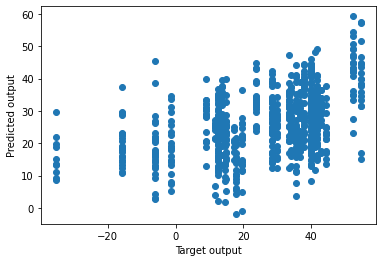

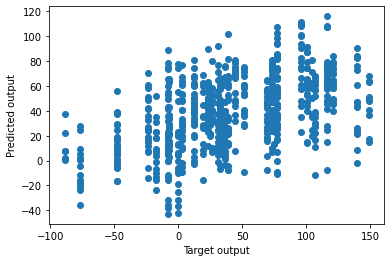

47.231769757488365


In [15]:
# variance in the features 
sigma_square = 100

# number of clusters
k = 25

# maximum number of iterations while finding K means clusters
iteration = 100

# means obtained using K means clustering algorithm
mean = KmeansClustering(k,x_train,iteration)

# regularisation coefficient
lamda = 0

# error between predicted and actual values of the target feature
error = erms_error_gaussian(x_train,y_train,lamda,mean,sigma_square,k)
print(error)